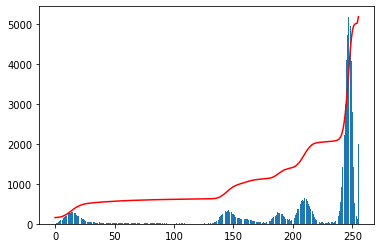

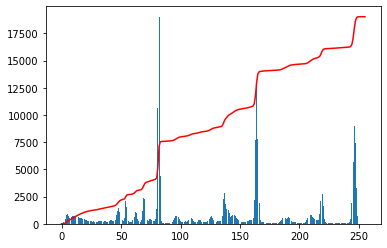

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

# membaca gambar
im1 = Image.open("asset_UTS1.jpeg").resize((255,255)).convert("L")
arr1 = np.array(im1.copy())
arr2 = np.array(im1.copy())

# memproses untuk mengurangi noise
keys = np.arange(256)
hist1 = np.zeros((256), dtype= np.uint32)
hist2 = np.zeros((256), dtype= np.uint32)
kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]], np.single)
hs = np.floor(kernel.shape[0]/2).astype(np.uint32)

for y in range(arr1.shape[0]):
    for x in range(arr1.shape[1]):
        if(random.random()>0.97):
           arr1[y,x] = 255
        if(random.random()<0.03):
            arr1[y,x] = 0
            
for y in range(arr1.shape[0]):
    for x in range(arr1.shape[1]):
        hist1[arr1[y,x]] = hist1[arr1[y,x]]+1;
        tmp = 0;
        for ky in range(kernel.shape[0]):
            for kx in range(kernel.shape[0]):
                py = min(max(y+ky-hs,0),arr1.shape[0]-1)
                px = min(max(x+kx-hs,0),arr1.shape[1]-1)
                tmp = tmp +arr1[py,px]*kernel[ky,kx]
            arr2[y,x] = np.floor(tmp).astype(np.uint8)
            hist2[arr2[y,x]] = hist2[arr2[y,x]]+1;

cdf1 = hist1.cumsum()
cdf1_norm = cdf1 * float(hist1.max()) / cdf1.max()

cdf2 = hist2.cumsum()
cdf2_norm = cdf2 * float(hist2.max()) / cdf2.max()

fig = plt.figure(1)
plt.bar(keys,hist1)
plt.plot(cdf1_norm, color = 'r')
fig.canvas.draw()
data1 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data1 = data1.reshape(fig.canvas.get_width_height()[::-1] + (3,))
histImage1 = Image.fromarray(data1).resize((255,255)).convert("L")
histNp1 = np.array(histImage1)

fig = plt.figure(2)
plt.bar(keys,hist2)
plt.plot(cdf2_norm, color = 'r')
fig.canvas.draw()
data2 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data2 = data2.reshape(fig.canvas.get_width_height()[::-1] + (3,))
histImage2 = Image.fromarray(data2).resize((255,255)).convert("L")
histNp2 = np.array(histImage2)

# JAWABAN NOMOR 1: menampilkan gambar yang sudah direduksi noise salt & peppernya dengan diubah menjadi grayscale
nomor1 = Image.fromarray(np.hstack(( np.vstack((histNp1,arr1)), np.vstack((histNp2,arr2))))).save('19312116_Akbar Hamonangan Lubis_UTS_Final\Hasil_UTS_Nomor1.png')

# meningkatkan intetitas warna hitam
arr3 = np.array(im1.copy())
for y in range(arr3.shape[0]):
    for x in range(arr3.shape[1]):
        if(arr3[y,x]<127):
            arr3[y,x] = 0
        else:
            arr3[y,x] = 255
# meningkatkan intetitas warna putih
arr4 = np.array(im1.copy())
for y in range(arr4.shape[0]):
    for x in range(arr4.shape[1]):
        if(arr4[y,x]>127):
            arr4[y,x] = 0
        else:
            arr4[y,x] = 255

# JAWABAN NOMOR 2: menampilkan gambar yang objek selain gambar sudah digelapkan
nomor2 = Image.fromarray(np.hstack(( np.vstack((arr3)), np.vstack((arr4))))).save('19312116_Akbar Hamonangan Lubis_UTS_Final\Hasil_UTS_Nomor2.png')

# menampilkan tepi gambar
kernel1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], np.single) 
kernel2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], np.single)
hs = np.floor(kernel1.shape[0]/2).astype(np.uint32)

for y in range(arr3.shape[0]):
    for x in range(arr3.shape[1]):
        tmpK1 = 0;
        tmpK2 = 0;
        for ky in range(kernel1.shape[0]):
            for kx in range(kernel2.shape[0]):
                py = min(max(y+ky-hs,0),arr3.shape[0]-1)
                px = min(max(x+kx-hs,0),arr3.shape[1]-1)
                tmpK1 = tmpK1 + arr3[py,px]*kernel1[ky,kx]
                tmpK2 = tmpK2 + arr3[py,px]*kernel2[ky,kx]
                
        tmpK1 = 255-tmpK1
        tmpK2 = 255-tmpK2
        arr2[y,x] = np.floor(min(max(tmpK1,0),255)).astype(np.uint8)
        arr3[y,x] = np.floor(min(max(tmpK2,0),255)).astype(np.uint8)
        arr4[y,x] = np.floor(min(max((tmpK1+tmpK2)/2,0),255)).astype(np.uint8)

# menampilkan tepi pada gambar
nomor3 = Image.fromarray(np.hstack((arr1,arr2,arr3,arr4))).save('19312116_Akbar Hamonangan Lubis_UTS_Final\Hasil_UTS_Nomor3.png')